In [2]:
# !pip install ultralytics

In [1]:
import cv2
from ultralytics import YOLO
import numpy as np
import torch




In [2]:
model = YOLO("best_aug.pt")

In [3]:
from numpy.lib.npyio import savetxt
from torch.serialization import save
predict = model.predict("/home/avinash/Projects/yolov8/windows_seg/overlap/new.jpg", save = True , save_txt = True)


image 1/1 /home/avinash/Projects/yolov8/windows_seg/overlap/new.jpg: 640x480 1 window, 85.8ms
Speed: 6.2ms preprocess, 85.8ms inference, 13.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict25
1 label saved to runs/segment/predict25/labels


In [4]:
type(predict[0])

ultralytics.engine.results.Results

In [6]:
# from torch._C import uint8
(predict[0].masks.data[0].cpu().numpy() *255).astype("uint8")

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
from google.colab.patches import cv2_imshow

ModuleNotFoundError: No module named 'google.colab'

In [8]:
cv2.imshow((predict[0].masks.data[0].cpu().numpy() *255).astype("uint8"))

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [ ]:
inverted_mask = cv2.bitwise_not((predict[0].masks.data[0].numpy() *255).astype("uint8"))


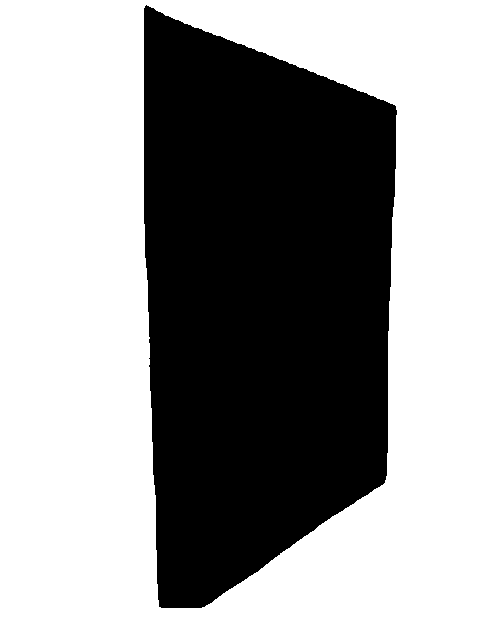

In [ ]:
cv2_imshow(inverted_mask)

In [ ]:
cv2.imwrite("alpha_mask1.jpg",inverted_mask.astype("uint8"))

True

In [ ]:
region_to_replace = cv2.bitwise_and(foreground, foreground, mask=inverted_mask)


error: ignored

In [ ]:
cv2.imwrite("alpha_mask.jpg",(predict[0].masks.data[0].numpy() *255).astype("uint8"))

True

In [ ]:
# Blending Images

In [ ]:
alpha_mask.shape[:2]

(640, 480)

In [ ]:
import cv2

# Read the images
foreground = cv2.imread("/content/orignal.jpg")
background = cv2.imread("/content/background.jpg")
alpha = cv2.imread("/content/alpha_mask.jpg")

# Convert uint8 to float
foreground = foreground.astype(float)
background = background.astype(float)

# Normalize the alpha mask to keep intensity between 0 and 1
alpha = alpha.astype(float)/255

# Multiply the foreground with the alpha matte
foreground = cv2.multiply(alpha, foreground)

# Multiply the background with ( 1 - alpha )
background = cv2.multiply(1.0 - alpha, background)

# Add the masked foreground and background.
outImage = cv2.add(foreground, background)

# Display image
cv2.imshow("outImg", outImage/255)
cv2.waitKey(0)

error: ignored

In [ ]:
print(alpha.shape[:2])
print(foreground.shape[:2])

(640, 480)
(4608, 3456)


In [ ]:
foreground = cv2.imread("/content/orignal.jpg")
background = cv2.imread("/content/background.jpg")
alpha = cv2.imread("/content/alpha_mask.jpg")


In [ ]:
if foreground.shape[:2] == alpha.shape:
  print("same")

In [ ]:
print(foreground.shape[:2])
print(alpha.shape)

(4608, 3456)
(640, 480, 3)
